In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append(r'../')
import StartChartingApp as sca

In [40]:
data = pd.read_csv(r'../resources/Pegasus Data (05-05-17 15h53m23s) - Waregem.csv', delimiter=',', header=5)
dm = sca.DataManager(data)
dm.split_sessions()
dm.test_print()
for session in dm.sessions:
    print(session.head(3))
    print()

2
  Master Index  Session Index Date (D/M/Y) Time (H:M:S)   Vcc  \
0        10816            0.0   18/04/2017     05:32:04  4.91   
1        10817            1.0   18/04/2017     05:32:14  4.96   
2        10818            2.0   18/04/2017     05:32:24  4.96   

   Battery Voltage  Temperature (degC)  Humidity (%)  Pressure (hPa)  \
0            12.03                 8.1          65.8         1018.25   
1            12.14                 7.6          66.2         1018.30   
2            12.16                 7.6          66.4         1018.28   

   Dust (pcs/litre)  CO (ppm)  CO2 (ppm)  NH3 (ppm)  O2(%)  Sound (dB)  \
0             34.99       0.0        0.0        0.0   9.58       75.83   
1             35.30       0.0        0.0        0.0   9.42       99.46   
2             36.09       0.0        0.0        0.0   9.59       52.89   

   Vibration (g)           date_time   tdelta  
0           0.14 2017-04-18 05:32:04 00:00:00  
1           0.30 2017-04-18 05:32:14 00:00:10  
2      

../StartChartingApp.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
../StartChartingApp.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  def split_sessions(self):


In [3]:
# Remove null dates
null_dates = data['Date (D/M/Y)'] == '0/0/0'
data = data[~null_dates]
date_str = data['Date (D/M/Y)']
time_str = data['Time (H:M:S)']
datetime_str = date_str + 'T' + time_str
# Create datetime column
datetimes = pd.to_datetime(datetime_str, format='%d/%m/%YT%H:%M:%S')
data['date_time'] = datetimes
data.head(5)

,Master Index,Session Index,Date (D/M/Y),Time (H:M:S),Vcc,Battery Voltage,Temperature (degC),Humidity (%),Pressure (hPa),Dust (pcs/litre),CO (ppm),CO2 (ppm),NH3 (ppm),O2(%),Sound (dB),Vibration (g),date_time
0,10816,0.0,18/04/2017,05:32:04,4.91,12.03,8.1,65.8,1018.25,34.99,0.0,0.0,0.00,9.58,75.83,0.14,2017-04-18 05:32:04
1,10817,1.0,18/04/2017,05:32:14,4.96,12.14,7.6,66.2,1018.30,35.30,0.0,0.0,0.00,9.42,99.46,0.30,2017-04-18 05:32:14
2,10818,2.0,18/04/2017,05:32:24,4.96,12.16,7.6,66.4,1018.28,36.09,0.0,0.0,0.00,9.59,52.89,0.08,2017-04-18 05:32:24
3,10819,3.0,18/04/2017,05:32:34,4.96,12.07,7.5,66.7,1018.22,39.23,0.0,0.0,48.54,9.32,53.03,0.08,2017-04-18 05:32:34
4,10820,4.0,18/04/2017,05:32:44,4.94,12.07,7.5,66.8,1018.27,35.93,0.0,0.0,27.49,9.42,52.27,0.08,2017-04-18 05:32:44


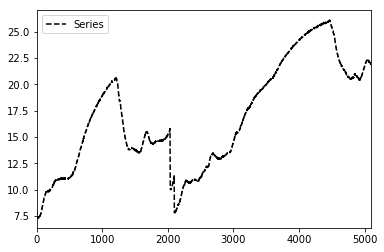

In [4]:
temperature_series = data['Temperature (degC)']
plt.figure()
temperature_series.plot(style='k--', label='Series')
plt.legend()

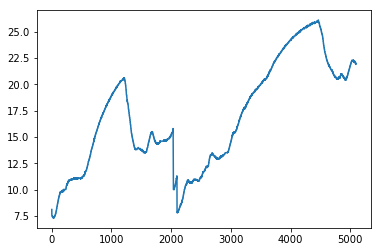

In [5]:
plt.plot(temperature_series.index, temperature_series.values)

<IPython.core.display.Javascript object>


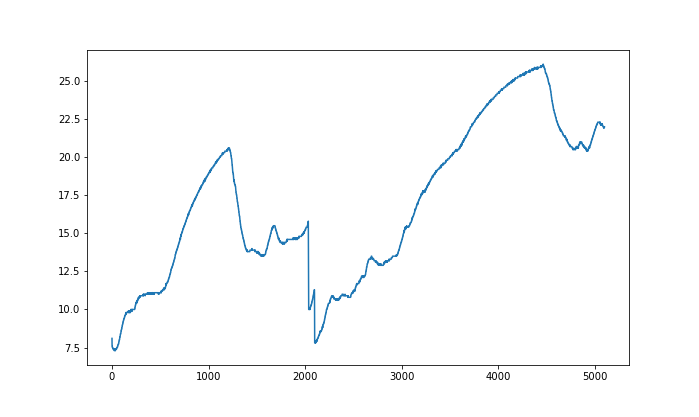

In [9]:
%matplotlib notebook
plt.plot(temperature_series.index, temperature_series.values)

In [7]:
data['tdelta'] = (data['date_time']-data['date_time'].shift()).fillna(0)
data.head(5)

,Master Index,Session Index,Date (D/M/Y),Time (H:M:S),Vcc,Battery Voltage,Temperature (degC),Humidity (%),Pressure (hPa),Dust (pcs/litre),CO (ppm),CO2 (ppm),NH3 (ppm),O2(%),Sound (dB),Vibration (g),date_time,tdelta
0,10816,0.0,18/04/2017,05:32:04,4.91,12.03,8.1,65.8,1018.25,34.99,0.0,0.0,0.00,9.58,75.83,0.14,2017-04-18 05:32:04,00:00:00
1,10817,1.0,18/04/2017,05:32:14,4.96,12.14,7.6,66.2,1018.30,35.30,0.0,0.0,0.00,9.42,99.46,0.30,2017-04-18 05:32:14,00:00:10
2,10818,2.0,18/04/2017,05:32:24,4.96,12.16,7.6,66.4,1018.28,36.09,0.0,0.0,0.00,9.59,52.89,0.08,2017-04-18 05:32:24,00:00:10
3,10819,3.0,18/04/2017,05:32:34,4.96,12.07,7.5,66.7,1018.22,39.23,0.0,0.0,48.54,9.32,53.03,0.08,2017-04-18 05:32:34,00:00:10
4,10820,4.0,18/04/2017,05:32:44,4.94,12.07,7.5,66.8,1018.27,35.93,0.0,0.0,27.49,9.42,52.27,0.08,2017-04-18 05:32:44,00:00:10


In [11]:
time_gaps = data['tdelta'] > pd.Timedelta('10 m')
# print(time_gaps)
print(data['tdelta'][time_gaps])
gaps = data[data['tdelta'] > pd.Timedelta('10 m')].index.tolist()
print(gaps)

2036   2 days 18:42:58
2096   2 days 02:02:46
2098   0 days 21:04:27
Name: tdelta, dtype: timedelta64[ns]
[2036, 2096, 2098]


In [13]:
df1 = data[:gaps[0]-2]
df1.tail(5)

,Master Index,Session Index,Date (D/M/Y),Time (H:M:S),Vcc,Battery Voltage,Temperature (degC),Humidity (%),Pressure (hPa),Dust (pcs/litre),CO (ppm),CO2 (ppm),NH3 (ppm),O2(%),Sound (dB),Vibration (g),date_time,tdelta
2029,12845,2029.0,18/04/2017,11:10:36,4.70,5.25,15.7,51.1,1026.11,27.53,0.28,1083.0,7.35,9.39,97.70,0.09,2017-04-18 11:10:36,00:00:10
2030,12846,2030.0,18/04/2017,11:10:46,4.68,5.24,15.7,51.3,1026.00,28.90,0.24,1083.0,7.74,9.36,97.64,0.09,2017-04-18 11:10:46,00:00:10
2031,12847,2031.0,18/04/2017,11:10:56,4.66,5.23,15.7,51.5,1026.05,25.07,0.22,1083.0,8.44,9.36,99.58,0.09,2017-04-18 11:10:56,00:00:10
2032,12848,2032.0,18/04/2017,11:11:06,4.66,5.20,15.8,51.9,1026.10,25.81,0.21,1083.0,9.19,9.39,98.43,0.09,2017-04-18 11:11:06,00:00:10
2033,12849,2033.0,18/04/2017,11:11:16,4.64,5.20,15.8,52.0,1026.04,24.97,0.19,1083.0,9.55,9.37,94.26,0.09,2017-04-18 11:11:16,00:00:10


In [ ]:
df2 = data[gaps[0]:gaps[1]]
df2.head(5)